In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import time
import random
import math


import numpy as np
import pandas as pd


import scipy as sp
import statsmodels.api as sm

import requests
from bs4 import BeautifulSoup


import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns


%matplotlib inline


%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumBarunGothic')


mpl.rc('axes', unicode_minus=False)

In [36]:
df= pd.read_csv('/content/drive/MyDrive/데청캠 1조/데이터/3. 최종 데이터/품목별/ver4/마늘_data.csv', encoding='utf-8') #euc-kr

In [37]:
for col in df.columns:
    print(col)

가격
품목
날짜
asos_평균_해면기압
asos_최고_해면기압
asos_최저_해면기압
asos_합계_일조시간
asos_일조율
asos_평균_상대습도
asos_최저_상대습도
lag1_asos_평균_해면기압
lag2_asos_평균_해면기압
lag3_asos_평균_해면기압
lag4_asos_평균_해면기압
lag5_asos_평균_해면기압
lag6_asos_평균_해면기압
lag7_asos_평균_해면기압
lag14_asos_평균_해면기압
lag21_asos_평균_해면기압
lag28_asos_평균_해면기압
lag1_asos_합계_일조시간
lag2_asos_합계_일조시간
lag3_asos_합계_일조시간
lag4_asos_합계_일조시간
lag5_asos_합계_일조시간
lag6_asos_합계_일조시간
lag7_asos_합계_일조시간
lag14_asos_합계_일조시간
lag21_asos_합계_일조시간
lag28_asos_합계_일조시간
lag1_asos_평균_상대습도
lag2_asos_평균_상대습도
lag3_asos_평균_상대습도
lag4_asos_평균_상대습도
lag5_asos_평균_상대습도
lag6_asos_평균_상대습도
lag7_asos_평균_상대습도
lag14_asos_평균_상대습도
lag21_asos_평균_상대습도
lag28_asos_평균_상대습도
asos_평균_해면기압_7일평균
asos_평균_해면기압_14일평균
aws_평균_기온
aws_최고_기온
aws_최저_기온
aws_합계_강수량
aws_평균_풍속
aws_최고_풍속
aws_일교차
aws_강수_유무
lag1_aws_평균_기온
lag2_aws_평균_기온
lag3_aws_평균_기온
lag4_aws_평균_기온
lag5_aws_평균_기온
lag6_aws_평균_기온
lag7_aws_평균_기온
lag14_aws_평균_기온
lag21_aws_평균_기온
lag28_aws_평균_기온
lag1_aws_합계_강수량
lag2_aws_합계_강수량
lag3_aws_합계_강수량
lag4_aws_합계_강수량
lag5_aws_합계_강수량
lag6_a

In [38]:
ns_data=df

In [39]:
#ns_data = ns_data[ns_data['품목']=='배추']
ns_data = ns_data.sort_values(by='날짜', ascending=True)
ns_data = ns_data.drop(['품목'], axis=1)
# '가격' 열의 값을 추출
original_open = ns_data['가격'].values

# 결과 출력
print(original_open)

[11154.09090909 11154.09090909 11154.09090909 ... 14601.26582278
 14601.26582278 14601.26582278]


In [40]:
# @title 기본 제목 텍스트
dates_all = pd.to_datetime(ns_data['날짜'])

# 2021-01-01을 기준으로 훈련 세트와 테스트 세트로 분리
split_date = '2021-01-01'
train_data = ns_data[ns_data['날짜'] < split_date]
test_data = ns_data[ns_data['날짜'] >= split_date]

print("Training Set:")
print(train_data)

print("\nTest Set:")
print(test_data)

print("Training Set:")
train_data_count=train_data.count()
train_data_dates = train_data['날짜']
print(train_data.count())

print("\nTest Set:")
test_data_count=test_data.count()
test_data_dates = test_data['날짜']
print(test_data.count())

# 시가 저장
original_open = ns_data['가격'].values

# plot에 사용할 날짜데이터 저장

#날짜 drop하는 부분

#ns_data = ns_data.drop(['날짜'],axis=1)

print(ns_data)

Training Set:
                가격          날짜  asos_평균_해면기압  asos_최고_해면기압  asos_최저_해면기압  \
0     11154.090909  2016-01-04      0.675126      0.641655      0.776544   
1     11154.090909  2016-01-05      0.746780      0.699718      0.835009   
2     11154.090909  2016-01-06      0.720428      0.688692      0.804802   
3     10614.318182  2016-01-07      0.707980      0.660770      0.812846   
4     10605.227273  2016-01-08      0.692761      0.647419      0.796298   
...            ...         ...           ...           ...           ...   
1222  10079.213483  2020-12-24      0.593001      0.545307      0.720289   
1223  10909.775281  2020-12-28      0.708763      0.662787      0.807958   
1224  11250.898876  2020-12-29      0.617728      0.629479      0.712577   
1225  11250.898876  2020-12-30      0.647788      0.642385      0.733607   
1226  11323.033708  2020-12-31      0.749339      0.700722      0.830060   

      asos_합계_일조시간  asos_일조율  asos_평균_상대습도  asos_최저_상대습도  lag1_asos_평균_해면

In [41]:
print(train_data.count())
print(test_data.count())


가격              1227
날짜              1227
asos_평균_해면기압    1227
asos_최고_해면기압    1227
asos_최저_해면기압    1227
                ... 
aws_최다_풍향_동     1227
aws_최다_풍향_북     1227
aws_최다_풍향_북동    1227
aws_최다_풍향_북서    1227
aws_최다_풍향_서     1227
Length: 131, dtype: int64
가격              248
날짜              248
asos_평균_해면기압    248
asos_최고_해면기압    248
asos_최저_해면기압    248
               ... 
aws_최다_풍향_동     248
aws_최다_풍향_북     248
aws_최다_풍향_북동    248
aws_최다_풍향_북서    248
aws_최다_풍향_서     248
Length: 131, dtype: int64


In [42]:
train_data

,가격,날짜,asos_평균_해면기압,asos_최고_해면기압,asos_최저_해면기압,asos_합계_일조시간,asos_일조율,asos_평균_상대습도,asos_최저_상대습도,lag1_asos_평균_해면기압,...,시도명_제주,시도명_충북,aws_최다_풍향_남,aws_최다_풍향_남동,aws_최다_풍향_남서,aws_최다_풍향_동,aws_최다_풍향_북,aws_최다_풍향_북동,aws_최다_풍향_북서,aws_최다_풍향_서
0,11154.090909,2016-01-04,0.675126,0.641655,0.776544,0.535619,0.755904,0.472213,0.523428,0.882686,...,0,1,0,0,1,0,0,0,0,0
1,11154.090909,2016-01-05,0.746780,0.699718,0.835009,0.135437,0.176163,0.351312,0.462252,0.789809,...,0,1,0,0,1,0,0,0,0,0
2,11154.090909,2016-01-06,0.720428,0.688692,0.804802,0.503342,0.706362,0.366519,0.565531,0.836048,...,0,1,0,0,1,0,0,0,0,0
3,10614.318182,2016-01-07,0.707980,0.660770,0.812846,0.440850,0.618143,0.390458,0.579173,0.819043,...,0,1,0,0,1,0,0,0,0,0
4,10605.227273,2016-01-08,0.692761,0.647419,0.796298,0.471285,0.660780,0.415796,0.587849,0.811010,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,10079.213483,2020-12-24,0.593001,0.545307,0.720289,0.520092,0.739069,0.439561,0.490140,0.812560,...,0,1,1,0,0,0,0,0,0,0
1223,10909.775281,2020-12-28,0.708763,0.662787,0.807958,0.534550,0.747433,0.777513,0.734639,0.736811,...,0,1,1,0,0,0,0,0,0,0
1224,11250.898876,2020-12-29,0.617728,0.629479,0.712577,0.193775,0.265491,0.761961,0.744111,0.811515,...,0,1,1,0,0,0,0,0,0,0
1225,11250.898876,2020-12-30,0.647788,0.642385,0.733607,0.465620,0.659403,0.430798,0.624080,0.752768,...,0,1,1,0,0,0,0,0,0,0


In [43]:
test_data

,가격,날짜,asos_평균_해면기압,asos_최고_해면기압,asos_최저_해면기압,asos_합계_일조시간,asos_일조율,asos_평균_상대습도,asos_최저_상대습도,lag1_asos_평균_해면기압,...,시도명_제주,시도명_충북,aws_최다_풍향_남,aws_최다_풍향_남동,aws_최다_풍향_남서,aws_최다_풍향_동,aws_최다_풍향_북,aws_최다_풍향_북동,aws_최다_풍향_북서,aws_최다_풍향_서
1227,11382.151899,2021-01-04,0.862914,0.851808,0.902464,0.576803,0.815052,0.455538,0.565078,0.837056,...,0,1,1,0,0,0,0,0,0,0
1228,11382.151899,2021-01-05,0.798727,0.760553,0.863734,0.335812,0.470203,0.392080,0.501025,0.910992,...,0,1,1,0,0,0,0,0,0,0
1229,11382.151899,2021-01-06,0.719270,0.742264,0.765515,0.569658,0.803882,0.410652,0.565786,0.869571,...,0,1,1,0,0,0,0,0,0,0
1230,11167.974684,2021-01-07,0.720309,0.683184,0.762891,0.526129,0.740011,0.327785,0.521099,0.818296,...,0,1,0,0,1,0,0,0,0,0
1231,10628.227848,2021-01-08,0.713419,0.678025,0.797729,0.599355,0.828131,0.351913,0.580295,0.818966,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,14521.139241,2021-12-27,0.853937,0.821556,0.906824,0.514801,0.731495,0.414929,0.565194,0.778553,...,0,1,0,0,0,1,0,0,0,0
1471,14601.265823,2021-12-28,0.795776,0.779986,0.853696,0.399509,0.564442,0.561815,0.693552,0.905199,...,0,1,0,0,0,1,0,0,0,0
1472,14601.265823,2021-12-29,0.645471,0.649335,0.748822,0.274940,0.382150,0.526475,0.683438,0.867667,...,0,0,0,0,0,1,0,0,0,0
1473,14601.265823,2021-12-30,0.717459,0.683018,0.788491,0.534766,0.758640,0.313200,0.505591,0.770671,...,0,1,0,0,0,1,0,0,0,0


In [44]:
train_data_d=train_data.drop(['날짜'],axis=1)
test_data_d=test_data.drop(['날짜'],axis=1)

train_x = train_data_d.drop(['가격'],axis=1)
train_y = train_data_d['가격']
test_x = test_data_d.drop(['가격'],axis=1)
test_y = test_data_d['가격']

In [45]:
test_y

1227    11382.151899
1228    11382.151899
1229    11382.151899
1230    11167.974684
1231    10628.227848
            ...     
1470    14521.139241
1471    14601.265823
1472    14601.265823
1473    14601.265823
1474    14601.265823
Name: 가격, Length: 248, dtype: float64

In [46]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 데이터 로드
train_x = train_data_d.drop(['가격'], axis=1)
train_y = train_data_d['가격']
test_x = test_data_d.drop(['가격'], axis=1)
test_y = test_data_d['가격']

# XGBoost 모델 설정
params = {
    'objective': 'reg:squarederror',  # 회귀 문제의 경우
    'max_depth': 3,
    'learning_rate': 0.01,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# XGBoost 데이터셋 생성
dtrain = xgb.DMatrix(train_x, label=train_y)
dtest = xgb.DMatrix(test_x, label=test_y)

# 모델 학습
model = xgb.train(params, dtrain)

# 테스트 데이터 예측
pred_y = model.predict(dtest)

# 예측 결과 평가 (평균 제곱 오차)
mse = mean_squared_error(test_y, pred_y)
print(f"Mean Squared Error: {mse:.2f}")


[11:45:30] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Mean Squared Error: 146722909.57


In [47]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 데이터 로드
train_x = train_data_d.drop(['가격'], axis=1)
train_y = train_data_d['가격']
test_x = test_data_d.drop(['가격'], axis=1)
test_y = test_data_d['가격']

# XGBoost 모델 설정
params = {
    'objective': 'reg:squarederror',  # 회귀 문제의 경우
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# XGBoost 데이터셋 생성
dtrain = xgb.DMatrix(train_x, label=train_y)
dtest = xgb.DMatrix(test_x, label=test_y)

# 모델 학습
model = xgb.train(params, dtrain)

# 테스트 데이터 예측
pred_y = model.predict(dtest)

# 예측 결과 평가 (평균 제곱 오차)
mse = mean_squared_error(test_y, pred_y)
print(f"Mean Squared Error: {mse:.2f}")


[11:45:31] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Mean Squared Error: 46934745.13


[11:45:31] WARNING: ../src/learner.cc:767: 
Parameters: { "explain_level", "n_estimators" } are not used.



<ipython-input-48-88a52ad72682>:91: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
<ipython-input-48-88a52ad72682>:91: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()


Mean Squared Error: 15417275.76
Root Mean Squared Error: 3926.48


<ipython-input-48-88a52ad72682>:91: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
<ipython-input-48-88a52ad72682>:91: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  plt.tight_layout()
<ipython-input-48-88a52ad72682>:91: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-48-88a52ad72682>:91: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
<ipython-input-48-88a52ad72682>:91: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  plt.tight_layout()
<ipython-input-48-88a52ad72682>:91: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  plt.tight_layout()
<ipython-input-48-88a52ad72682>:91: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  plt.tight_layout()
<ipython-input-48-88a52ad72682>:91: UserWarning: Glyp

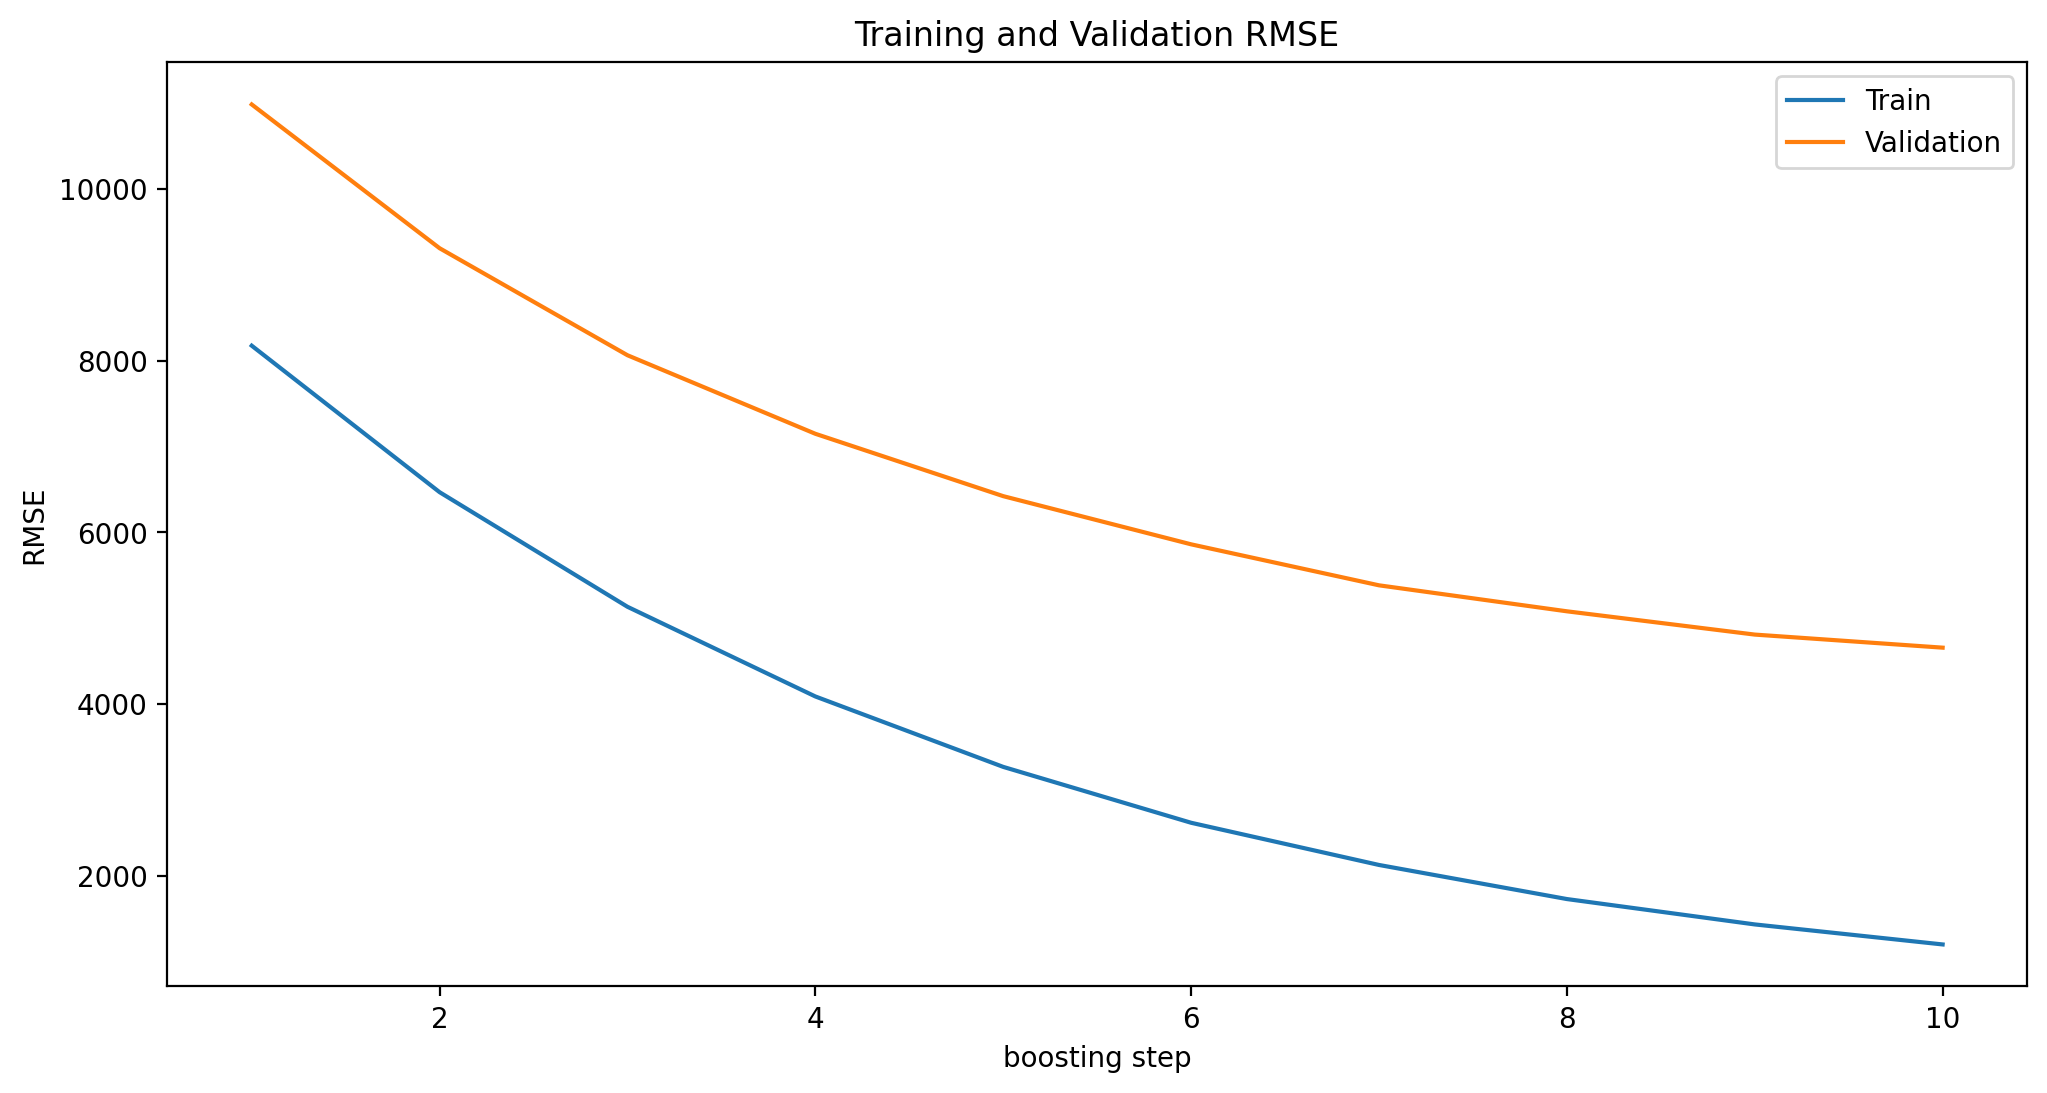

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

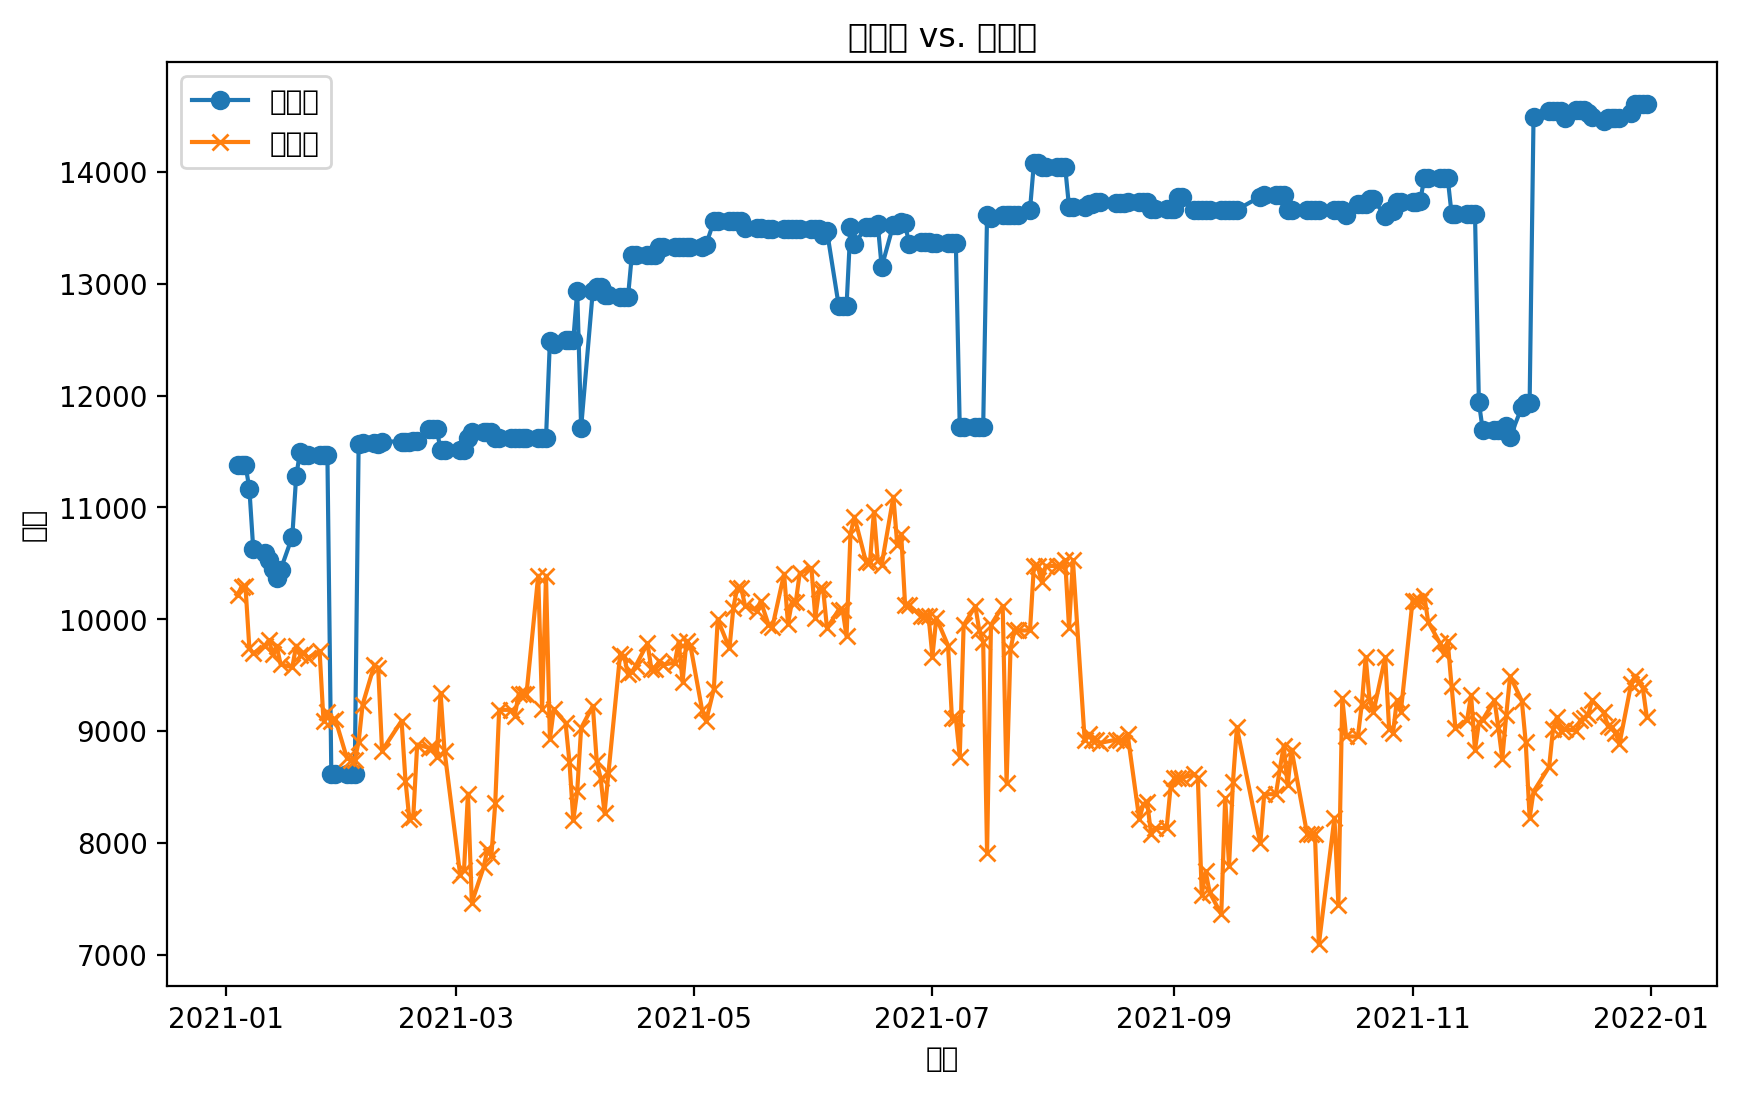

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


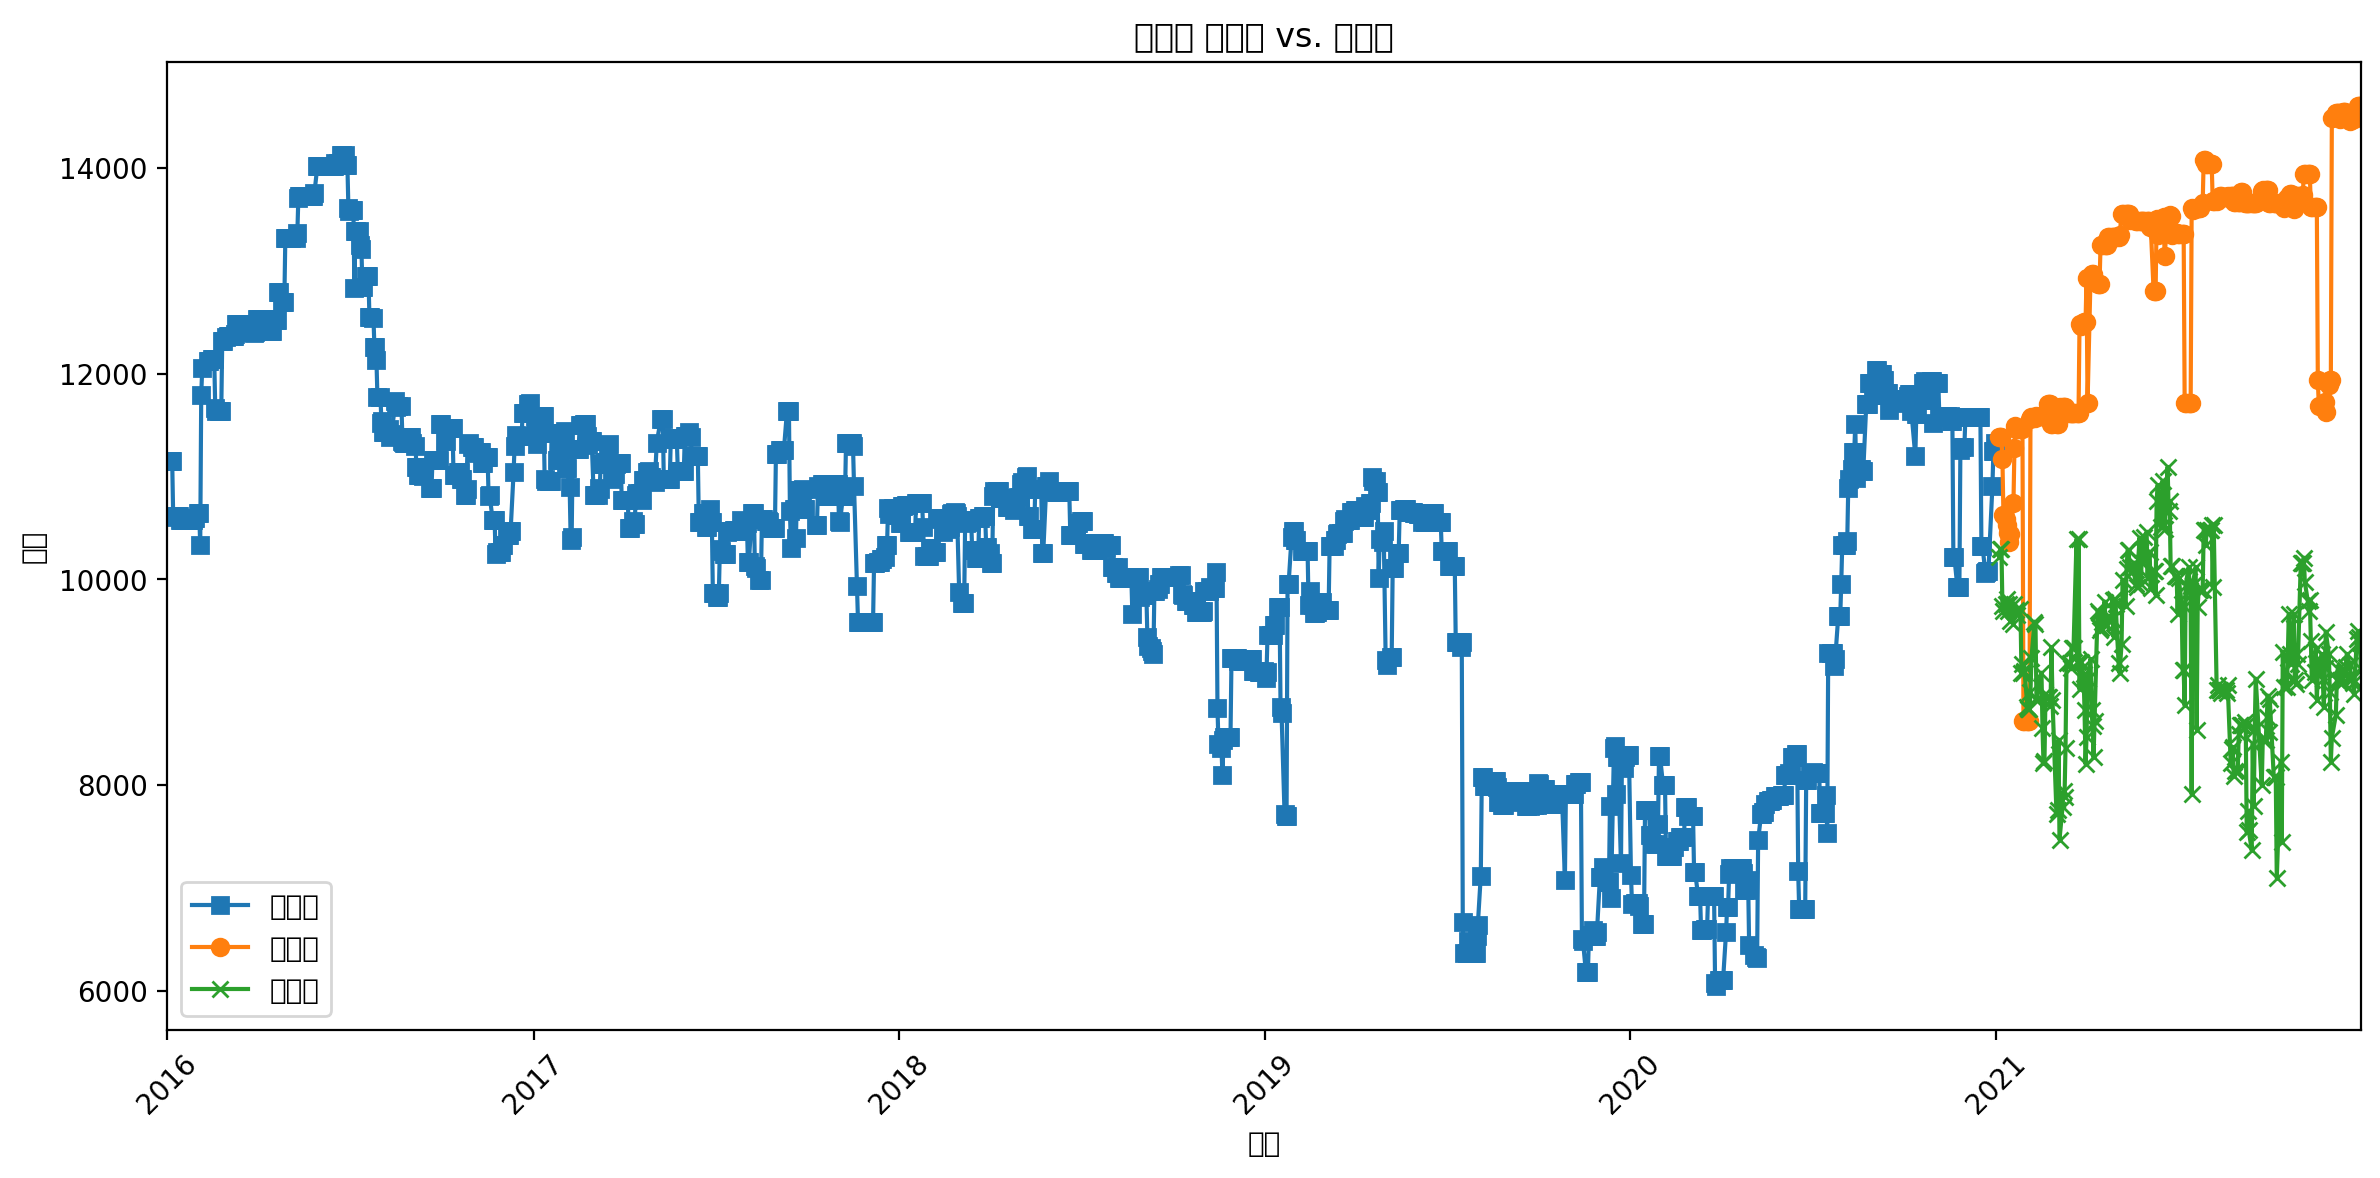

In [48]:
#####최종 plot 3개
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd

# 데이터 로드
train_x = train_data_d.drop(['가격'], axis=1)
train_y = train_data_d['가격']
test_x = test_data_d.drop(['가격'], axis=1)
test_y = test_data_d['가격']

# XGBoost 모델 설정 (파라미터 조정)
params = {
    'objective': 'reg:squarederror',  # 회귀 문제의 경우
    'max_depth': 6,
    'learning_rate': 0.315,
    'n_estimators': 100,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'min_child_weight': 1,
    'seed': 42,
    'n_jobs': -1,
    'eval_metric': 'rmse',
    'explain_level': 2
}

# XGBoost 데이터셋 생성
dtrain = xgb.DMatrix(train_x, label=train_y)
dtest = xgb.DMatrix(test_x, label=test_y)

# 모델 학습
model = xgb.train(params, dtrain)

# 테스트 데이터 예측
pred_y = model.predict(dtest)

# 예측 결과 평가 (평균 제곱 오차)
mse = mean_squared_error(test_y, pred_y)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# 날짜를 월별로 변환
test_data_dates = pd.to_datetime(test_data['날짜'])
test_data_months = test_data_dates.dt.to_period('M')
train_data_dates = pd.to_datetime(train_data['날짜'])
train_data_months = train_data_dates.dt.to_period('M')

# 날짜 범위 설정
start_date = pd.Timestamp('2016-01-01')
end_date = pd.Timestamp('2021-12-31')

num_boost_rounds = len(eval_results['train']['rmse'])
x_values = range(1, num_boost_rounds + 1)
# 훈련 및 검증 손실 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(x_values,eval_results['train']['rmse'], label='Train')
plt.plot(x_values,eval_results['eval']['rmse'], label='Validation')
plt.xlabel('boosting step')
plt.ylabel('RMSE')
plt.title('Training and Validation RMSE')
plt.legend()
# 라인 차트로 예측값과 실제값 그리기
plt.figure(figsize=(10, 6))
x_values = np.arange(len(test_y))
plt.plot(test_data_dates, test_y, label='실제값', marker='o')
plt.plot(test_data_dates, pred_y, label='예측값', marker='x')
plt.xlabel("날짜")
plt.ylabel("가격")
plt.title("실제값 vs. 예측값")
plt.legend()
# 날짜별 예측값과 실제값 라인 차트로 그리기
plt.figure(figsize=(12, 6))
plt.plot(train_data_dates, train_y, label='훈련값', marker='s')
plt.plot(test_data_dates, test_y, label='실제값', marker='o')
plt.plot(test_data_dates, pred_y, label='예측값', marker='x')
plt.xlabel("날짜")
plt.ylabel("가격")
plt.title("날짜별 실제값 vs. 예측값")
plt.xticks(rotation=45)

# x축 범위 설정
plt.xlim(start_date, end_date)

# RMSE 값 표시
#plt.text(start_date, max(test_y), f"RMSE: {rmse:.2f}", ha='left', va='bottom', color='red')

plt.legend()
plt.tight_layout()
plt.show()


In [49]:
train_x = train_data_d.drop(['가격'], axis=1)
train_y = train_data_d['가격']
test_x = test_data_d.drop(['가격'], axis=1)
test_y = test_data_d['가격']

In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
# 데이터 전처리
scaler = MinMaxScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# LSTM 모델 생성
# Feedforward Neural Network 모델 생성
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=train_x_scaled.shape[1]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(train_x_scaled, train_y, epochs=10, batch_size=32, validation_split=0.2)

# 모델 평가
loss = model.evaluate(test_x_scaled, test_y)
print(f"Test Loss: {loss}")

Epoch 1/10
31/31 [==============================] - 3s 18ms/step - loss: 111918216.0000 - val_loss: 87679976.0000
Epoch 2/10
31/31 [==============================] - 0s 5ms/step - loss: 111741616.0000 - val_loss: 87483064.0000
Epoch 3/10
31/31 [==============================] - 0s 7ms/step - loss: 111477424.0000 - val_loss: 87207712.0000
Epoch 4/10
31/31 [==============================] - 0s 12ms/step - loss: 111119544.0000 - val_loss: 86845704.0000
Epoch 5/10
31/31 [==============================] - 0s 5ms/step - loss: 110661512.0000 - val_loss: 86393664.0000
Epoch 6/10
31/31 [==============================] - 0s 7ms/step - loss: 110100352.0000 - val_loss: 85849072.0000
Epoch 7/10
31/31 [==============================] - 0s 11ms/step - loss: 109434960.0000 - val_loss: 85213296.0000
Epoch 8/10
31/31 [==============================] - 0s 14ms/step - loss: 108666672.0000 - val_loss: 84487224.0000
Epoch 9/10
31/31 [==============================] - 0s 12ms/step - loss: 107797072.0000 - va